# Study Cases

Telecommunications industry development so rapidly, this can be seen from the behavior of the community who use the internet to communicate. This behavior causes many companies internet service from telecommunications providers who can create competition
between providers. The customer has the right to choose the provider can switch from the appropriate provider previously defined as <b>Customer Churn</b>. This switch can reduce telecommunications company revenue. So it's important to deal with it.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Import Data set and Concat Data Frame

In [2]:
# Make the function concat for merge two dataset (train.csv & test.csv) into one dataframe
def df_concat(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

We make a function to merge two dataset (train & test) into one dataframe. The function name is df_concat

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = df_concat(df_train, df_test)
pd.set_option('display.max_columns', None)

Load train & test dataset using pandas and then merge theme using the function what we created before.

In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [6]:
# Shape train and test data
print('Train shape : {}'.format(df_train.shape))
print('Test shape : {}'.format(df_test.shape))

Train shape : (4250, 20)
Test shape : (750, 20)


In [7]:
# Given each of DataFrame
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

In [8]:
dfs = [df_train, df_test]

In [9]:
df_all

,account_length,area_code,churn,id,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
0,107,area_code_415,no,NaN,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
1,137,area_code_415,no,NaN,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
2,84,area_code_408,no,NaN,yes,2,0,OH,71,50.90,299.4,88,5.26,61.9,7,1.78,6.6,89,8.86,196.9,no
3,75,area_code_415,no,NaN,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no
4,121,area_code_510,no,NaN,no,3,24,MA,88,37.09,218.2,108,29.62,348.5,7,2.03,7.5,118,9.57,212.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,130,area_code_415,NaN,746.0,no,0,0,GA,99,20.30,119.4,97,19.24,226.3,7,3.05,11.3,111,9.12,202.7,no
4996,73,area_code_408,NaN,747.0,no,3,0,WA,118,30.12,177.2,84,22.99,270.5,2,3.32,12.3,112,10.88,241.8,no
4997,152,area_code_415,NaN,748.0,no,3,0,WV,90,31.31,184.2,73,21.83,256.8,2,3.97,14.7,113,9.61,213.6,no
4998,61,area_code_415,NaN,749.0,no,1,0,DC,89,23.90,140.6,128,14.69,172.8,4,3.67,13.6,97,9.56,212.4,no


### The Columns

1. <b>State</b> &rarr; US State
2. <b>account_length</b> &rarr; total months of customers being telco provider users
3. <b>area_code</b> &rarr; Area Code
4. <b>international_plan</b> &rarr; The Customer has international plan
5. <b>voice_mail_plan</b> &rarr; The Customer has voice mail plan
6. <b>number_vmail_messages</b> &rarr; Total Messages of Voice Mail
7. <b>total_day_minutes</b> &rarr; Total minutes on day calls
8. <b>total_day_calls</b> &rarr; Total Day Calls
9. <b>total_day_charge</b> &rarr; Total charge from day calls
10. <b>total_eve_minutes</b> &rarr; Total minutes on evening calls
11. <b>total_eve_calls</b> &rarr; Total evening calls
12. <b>total_eve_charge</b> &rarr; Total charge from evening calls
13. <b>total_night_minutes</b> &rarr; Total minutes on on Night Calls
14. <b>total_night_calls</b> &rarr; Total night calls
15. <b>total_night_charge</b> &rarr; Total charge on night call
16. <b>total_intl_minutes</b> &rarr; Total minutes on international calls
17. <b>total_intl_calls</b> &rarr; Total international calls 
18. <b>total_intl_charge</b> &rarr; Total charge on international calls
19. <b>number_customer_service_calls</b> &rarr; Total calls to customer service
20. <b>Churn</b> &rarr; Customer Churn

## Cleansing Data

### Shape and Info Dataset

In [10]:
# See the dataset shape
print('Dataset shape:', df_all.shape)
print("")
# See the dataset info
print('Dataset info :', df_all.info())

Dataset shape: (5000, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   area_code                      5000 non-null   object 
 2   churn                          4250 non-null   object 
 3   id                             750 non-null    float64
 4   international_plan             5000 non-null   object 
 5   number_customer_service_calls  5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   state                          5000 non-null   object 
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_day_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge     

### Checking & Deleting Null Values

In [11]:
# Checking on null values
print(df_all.isnull().sum())

account_length                      0
area_code                           0
churn                             750
id                               4250
international_plan                  0
number_customer_service_calls       0
number_vmail_messages               0
state                               0
total_day_calls                     0
total_day_charge                    0
total_day_minutes                   0
total_eve_calls                     0
total_eve_charge                    0
total_eve_minutes                   0
total_intl_calls                    0
total_intl_charge                   0
total_intl_minutes                  0
total_night_calls                   0
total_night_charge                  0
total_night_minutes                 0
voice_mail_plan                     0
dtype: int64


There are two columns which have a null values. They are churn and id with detected 750 null values and 4250 null values.

In [12]:
# Delete irrelevant column
df_all = df_all.drop(['id'], axis=1)
df_all.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
0,107,area_code_415,no,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
1,137,area_code_415,no,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
2,84,area_code_408,no,yes,2,0,OH,71,50.90,299.4,88,5.26,61.9,7,1.78,6.6,89,8.86,196.9,no
3,75,area_code_415,no,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no
4,121,area_code_510,no,no,3,24,MA,88,37.09,218.2,108,29.62,348.5,7,2.03,7.5,118,9.57,212.6,yes


Delete ID column because the column will not be used for the next step. So, we can delete the column

In [13]:
# Percentage of missing values
length_churn = len(df_all['churn'])
count_churn = df_all['churn'].count()
print('Length from churn :', length_churn)
print('Count from churn :', count_churn)

# Substract the length with count
number_of_missing_values = length_churn - count_churn
print('Number of Missing Values :', number_of_missing_values)

# The Ratio of Missing Values from the churn
float_missing_values = float(number_of_missing_values/length_churn)
print('The Ratio of Missing Values :', float_missing_values)

# Change into percent
percent_missing_values = '{0:.1f}%'.format(float_missing_values * 100)
print('Percentage of Missing Values from Churn Column', percent_missing_values)

Length from churn : 5000
Count from churn : 4250
Number of Missing Values : 750
The Ratio of Missing Values : 0.15
Percentage of Missing Values from Churn Column 15.0%


From the previous step that the Churn column has 750 null values and since this column is a target label for predicting so we have to cleansing it. Through this process it was found that this column has a missing value with a percentage of 15%, I think this is missing quite a lot. We can fill this null values since it's a categorical so we use Mode.

In [14]:
df_all['churn'].fillna(df_all['churn'].mode()[0], inplace=True)

In [15]:
df_all.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
0,107,area_code_415,no,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
1,137,area_code_415,no,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
2,84,area_code_408,no,yes,2,0,OH,71,50.90,299.4,88,5.26,61.9,7,1.78,6.6,89,8.86,196.9,no
3,75,area_code_415,no,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no
4,121,area_code_510,no,no,3,24,MA,88,37.09,218.2,108,29.62,348.5,7,2.03,7.5,118,9.57,212.6,yes


In [16]:
# Checking null values and shape
print(df_all.isnull().sum())
print('')
print('Dataset shape now :', df_all.shape)

account_length                   0
area_code                        0
churn                            0
international_plan               0
number_customer_service_calls    0
number_vmail_messages            0
state                            0
total_day_calls                  0
total_day_charge                 0
total_day_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_eve_minutes                0
total_intl_calls                 0
total_intl_charge                0
total_intl_minutes               0
total_night_calls                0
total_night_charge               0
total_night_minutes              0
voice_mail_plan                  0
dtype: int64

Dataset shape now : (5000, 20)


Now there are no null values from churn column and the dataset shape now is still 5000 rows and 20 columns

### Checking and deleting Duplicate rows

In [17]:
# Checking for duplication
duplicate_rows_df_all = df_all[df_all.duplicated()]
print('Number of Duplicated Rows:', duplicate_rows_df_all.shape)

Number of Duplicated Rows: (0, 20)


We found that there are no duplicate rows so we dont have to worried about it.

### Detecting and Deleting Outliers

In [18]:
# Quartiles
Q3 = df_all.quantile(0.75)
Q1 = df_all.quantile(0.25)
    
# IQR
IQR = Q3 - Q1
print(IQR)

account_length                   54.000
number_customer_service_calls     1.000
number_vmail_messages            17.000
total_day_calls                  26.000
total_day_charge                 12.320
total_day_minutes                72.500
total_eve_calls                  27.000
total_eve_charge                  5.760
total_eve_minutes                67.725
total_intl_calls                  3.000
total_intl_charge                 0.940
total_intl_minutes                3.500
total_night_calls                26.000
total_night_charge                3.050
total_night_minutes              67.800
dtype: float64


In [19]:
# Minimum non-outlier value
min_val = Q1 - 1.5*IQR
# Maximum non-outlier value
max_val = Q3 + 1.5*IQR
    
# Deleting Outliers
df_all = df_all[~((df_all < min_val) | (df_all > max_val)).any(axis=1)]

C:\Users\ACER\AppData\Local\Temp\ipykernel_8956\3807949705.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_all = df_all[~((df_all < min_val) | (df_all > max_val)).any(axis=1)]
C:\Users\ACER\AppData\Local\Temp\ipykernel_8956\3807949705.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_all = df_all[~((df_all < min_val) | (df_all > max_val)).any(axis=1)]


In [20]:
df_all = df_all.reset_index(drop=True)
df_all

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
0,107,area_code_415,no,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
1,137,area_code_415,no,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
2,75,area_code_415,no,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no
3,147,area_code_415,no,yes,0,0,MO,79,26.69,157.0,94,8.76,103.1,6,1.92,7.1,96,9.53,211.8,no
4,141,area_code_415,no,yes,0,37,WV,84,43.96,258.6,111,18.87,222.0,5,3.02,11.2,97,14.69,326.4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,130,area_code_415,no,no,0,0,GA,99,20.30,119.4,97,19.24,226.3,7,3.05,11.3,111,9.12,202.7,no
4156,73,area_code_408,no,no,3,0,WA,118,30.12,177.2,84,22.99,270.5,2,3.32,12.3,112,10.88,241.8,no
4157,152,area_code_415,no,no,3,0,WV,90,31.31,184.2,73,21.83,256.8,2,3.97,14.7,113,9.61,213.6,no
4158,61,area_code_415,no,no,1,0,DC,89,23.90,140.6,128,14.69,172.8,4,3.67,13.6,97,9.56,212.4,no


We deleted 840 rows that are contained a outliers, so the data has 4160 rows now

## Exploratory Data Analysis

### Descriptive Statistics

In [21]:
df_all.describe(include='all')

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
count,4160.000000,4160,4160,4160,4160.000000,4160.00000,4160,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160
unique,NaN,3,2,2,NaN,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,area_code_415,no,no,NaN,NaN,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,2077,3791,3773,NaN,NaN,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3084
mean,99.543029,NaN,NaN,NaN,1.316106,7.38149,NaN,99.997115,30.623731,180.136226,100.179087,17.058334,200.683774,4.267308,2.785707,10.315505,99.841106,9.021026,200.464952,NaN
std,39.188959,NaN,NaN,NaN,0.976930,13.02375,NaN,19.209942,8.897424,52.338228,19.320058,4.162089,48.965382,2.066388,0.693571,2.569106,19.197709,2.202482,48.943734,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.00000,NaN,48.000000,5.970000,35.100000,47.000000,5.540000,65.200000,1.000000,0.890000,3.300000,48.000000,2.960000,65.700000,NaN
25%,73.000000,NaN,NaN,NaN,1.000000,0.00000,NaN,87.000000,24.450000,143.800000,87.000000,14.200000,167.000000,3.000000,2.320000,8.600000,87.000000,7.530000,167.300000,NaN
50%,100.000000,NaN,NaN,NaN,1.000000,0.00000,NaN,100.000000,30.600000,180.000000,100.000000,17.090000,201.000000,4.000000,2.810000,10.400000,100.000000,9.010000,200.200000,NaN
75%,126.000000,NaN,NaN,NaN,2.000000,15.00000,NaN,113.000000,36.700000,215.900000,113.000000,19.870000,233.800000,5.000000,3.240000,12.000000,113.000000,10.570000,234.825000,NaN


In [22]:
numeric_col = ['account_length', 'number_customer_service_calls', 'number_vmail_messages', 'total_day_calls', 'total_day_charge',
              'total_day_minutes', 'total_eve_calls', 'total_eve_charge', 'total_eve_minutes', 'total_intl_calls', 'total_intl_charge',
              'total_intl_minutes', 'total_night_calls', 'total_night_charge', 'total_night_minutes']
df_all_col = df_all.loc[:,numeric_col]

In [23]:
def measure_spread(df):
    
    # range
    df_range = df.max() - df.min()
    
    # variance
    df_variance = df.var()
    
    return df_range, df_variance

In [24]:
measure_spread(df_all_col)

(account_length                   204.00
 number_customer_service_calls      3.00
 number_vmail_messages             42.00
 total_day_calls                  104.00
 total_day_charge                  49.23
 total_day_minutes                289.60
 total_eve_calls                  107.00
 total_eve_charge                  22.94
 total_eve_minutes                269.80
 total_intl_calls                   9.00
 total_intl_charge                  3.75
 total_intl_minutes                13.90
 total_night_calls                104.00
 total_night_charge                12.16
 total_night_minutes              270.40
 dtype: float64,
 account_length                   1535.774537
 number_customer_service_calls       0.954393
 number_vmail_messages             169.618075
 total_day_calls                   369.021872
 total_day_charge                   79.164149
 total_day_minutes                2739.290154
 total_eve_calls                   373.264626
 total_eve_charge                   17.322981


Things about total minutes calls on the day, evening, and night have more variances. But from these three, Total Day Minutes have a 2739.2 variances of data. And the total charge day calls have more variances than the other charge day calls which the variances 79.16

In [25]:
# Make a new column for total calls, total charge, and total minutes on call

df_all['total_calls'] = df_all['total_day_calls'] + df_all['total_eve_calls'] + df_all['total_night_calls'] + df_all['total_intl_calls']
df_all['total_charge'] = df_all['total_day_charge'] + df_all['total_eve_charge'] + df_all['total_night_charge'] + df_all['total_intl_charge']
df_all['total_minutes'] = df_all['total_day_minutes'] + df_all['total_eve_minutes'] + df_all['total_night_minutes'] + df_all['total_intl_minutes']

df_all.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan,total_calls,total_charge,total_minutes
0,107,area_code_415,no,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes,332,59.24,625.2
1,137,area_code_415,no,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no,333,62.29,539.4
2,75,area_code_415,no,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no,359,52.09,512.0
3,147,area_code_415,no,yes,0,0,MO,79,26.69,157.0,94,8.76,103.1,6,1.92,7.1,96,9.53,211.8,no,275,46.90,479.0
4,141,area_code_415,no,yes,0,37,WV,84,43.96,258.6,111,18.87,222.0,5,3.02,11.2,97,14.69,326.4,yes,297,80.54,818.2


In [26]:
df_all['churn'].value_counts()

no     3791
yes     369
Name: churn, dtype: int64

In [27]:
df_all['international_plan'].value_counts()

no     3773
yes     387
Name: international_plan, dtype: int64

In [28]:
df_all['voice_mail_plan'].value_counts()

no     3084
yes    1076
Name: voice_mail_plan, dtype: int64

### Data Distribution

#### Grouped Length of Time a User has been a User in Years 

In [29]:
def group_account_length(x):
    if x <= 12:
        return 'Less than 1 year'
    elif 12 < x <= 36:
        return 'Less than or 3 years'
    elif 36 < x <= 72:
        return 'Less than or 6 years'
    else:
        return 'More than 6 years'

# Add a new column
df_all['account_length_group'] = df_all['account_length'].map(group_account_length)
df_all.head()

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan,total_calls,total_charge,total_minutes,account_length_group
0,107,area_code_415,no,no,1,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes,332,59.24,625.2,More than 6 years
1,137,area_code_415,no,no,0,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no,333,62.29,539.4,More than 6 years
2,75,area_code_415,no,yes,3,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no,359,52.09,512.0,More than 6 years
3,147,area_code_415,no,yes,0,0,MO,79,26.69,157.0,94,8.76,103.1,6,1.92,7.1,96,9.53,211.8,no,275,46.90,479.0,More than 6 years
4,141,area_code_415,no,yes,0,37,WV,84,43.96,258.6,111,18.87,222.0,5,3.02,11.2,97,14.69,326.4,yes,297,80.54,818.2,More than 6 years


In [30]:
plt.rcParams['figure.figsize'] = (12,5)

#### Distribution Account Length Group based on Churn

<AxesSubplot:xlabel='account_length_group', ylabel='count'>

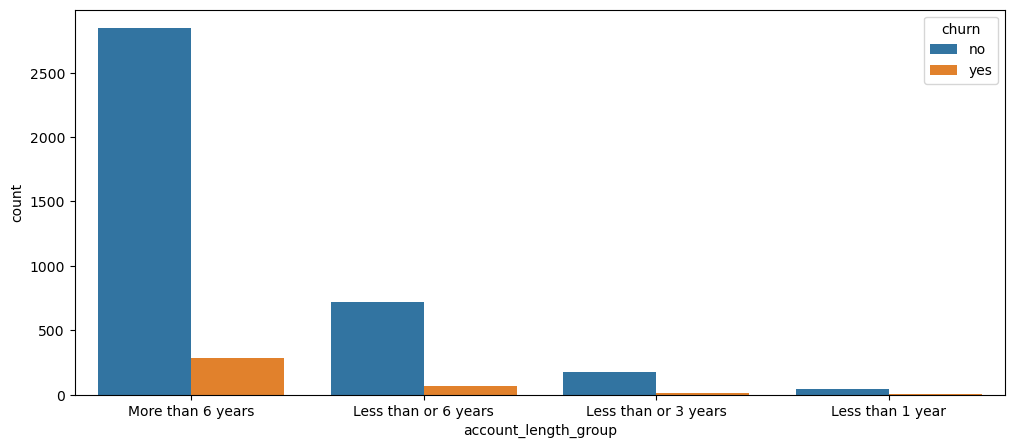

In [31]:
sns.countplot(x='account_length_group', hue='churn', data=df_all)

As we can see that a large number of customers not churn are more than 6 years and it's a small number for churn customers. The customers who have used this provider more than 6 years are still very royal to the telco provider. 

#### Distribution Account Length Group based on Area Code

<AxesSubplot:xlabel='account_length_group', ylabel='count'>

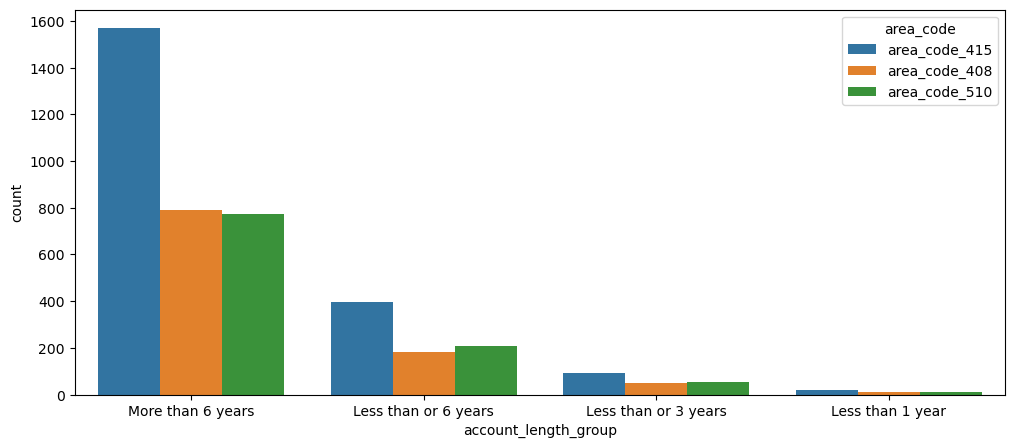

In [32]:
sns.countplot(x='account_length_group', hue='area_code', data=df_all)

This telecomm company has a very large number of customers from area code 415 and they also become customers who have been running for more than 6 years more than customers from area code 408 & 510. We also know that customer length is mostly from Area Code 415 and this is followed by area code 408 and area code 510 where they have almost the same number of users in each of account length group.

#### Distribution Comparing International Plan and Vmail Plan

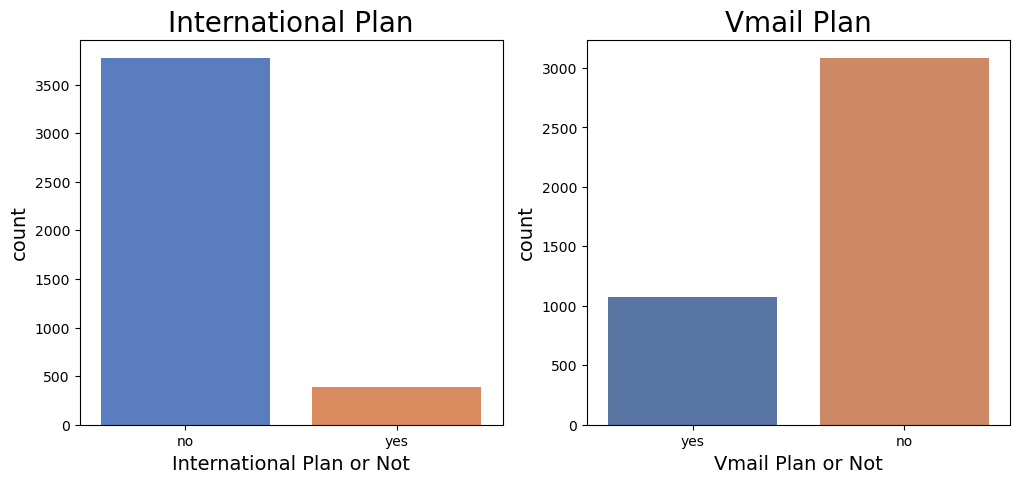

In [33]:
# Checking the distribution of customers on international plan
plt.subplot(1,2,1)
sns.countplot(x='international_plan', data=df_all, palette = 'muted')
plt.title('International Plan', fontsize=20)
plt.xlabel('International Plan or Not', fontsize=14)
plt.ylabel('count', fontsize=14)

# Checking the distribution of Customers on vmail plan
plt.subplot(1,2,2)
sns.countplot(x='voice_mail_plan', data=df_all, palette = 'deep')
plt.title('Vmail Plan', fontsize=20)
plt.xlabel('Vmail Plan or Not', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

# 

More Customers make Vmail Plan than an International Plan. We know that people rarely to do an international plan because people usually use for Business things and communicate with relative/family who lives overseas. 

### Barchart

#### Top 5 State by Total minutes on day calls

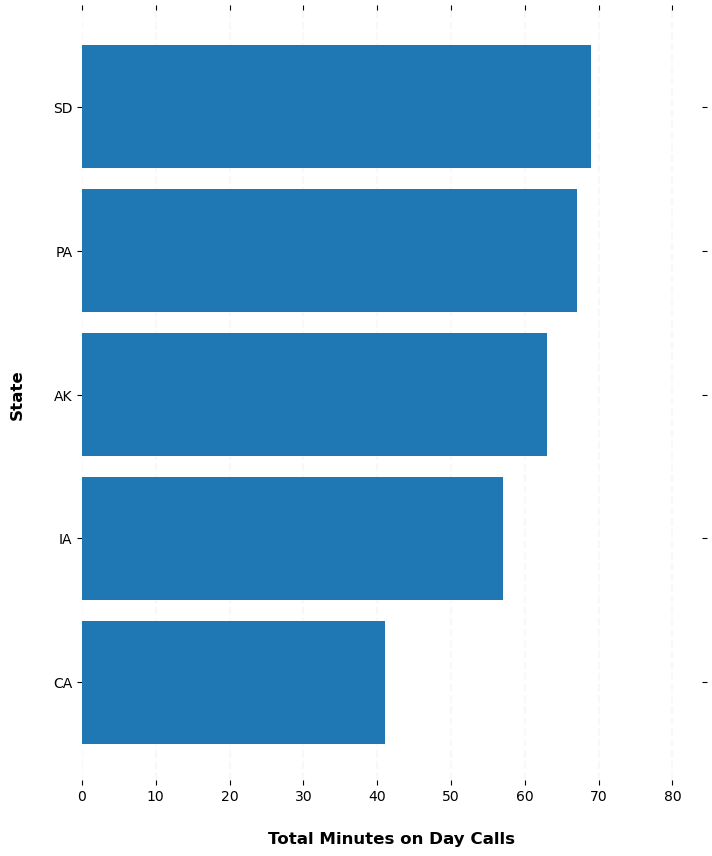

In [34]:
sorted_by_state = df_all.groupby('state')['total_calls'].count().sort_values().head(5)

ax = sorted_by_state.plot(kind='barh', figsize=(8,10), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
# Set x-axis label
ax.set_xlabel("Total Minutes on Day Calls", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("State", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#### The Distribution of Categorization Average Total Calls in Hours

In [35]:
#df_all['average_minutes_calls'] = df_all[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].mean(axis=1)
#df_all.head()

In [36]:
# df_all.describe()

In [37]:
"""def group_total_minutes(x):
    if(x >= 70 and x <= 140):
        return '1. 70 - 140 minutes'
    elif(x > 140 and x <= 210):
        return '2. >140 - 210 minutes'
    else:
        return '3. >210 minutes'

# Add a new column
df_all['average_minutes_calls_group'] = df_all['average_minutes_calls'].map(group_total_minutes)
df_all.head()"""

"def group_total_minutes(x):\n    if(x >= 70 and x <= 140):\n        return '1. 70 - 140 minutes'\n    elif(x > 140 and x <= 210):\n        return '2. >140 - 210 minutes'\n    else:\n        return '3. >210 minutes'\n\n# Add a new column\ndf_all['average_minutes_calls_group'] = df_all['average_minutes_calls'].map(group_total_minutes)\ndf_all.head()"

In [38]:
""""df_groupby = df_all.groupby(['average_minutes_calls_group'])['area_code'].count()
df_groupby.plot(x = 'Average minutes calls group', y = 'Area Code', kind = 'bar')
plt.xlabel('Average minutes Calls Group')
plt.ylabel('Area Code')
plt.show()"""

'"df_groupby = df_all.groupby([\'average_minutes_calls_group\'])[\'area_code\'].count()\ndf_groupby.plot(x = \'Average minutes calls group\', y = \'Area Code\', kind = \'bar\')\nplt.xlabel(\'Average minutes Calls Group\')\nplt.ylabel(\'Area Code\')\nplt.show()'

### KDE (Kernel Density Estimate)

#### Churn by Total Charges

Text(0.5, 1.0, 'Distribution of Total Day Charges by Churn')

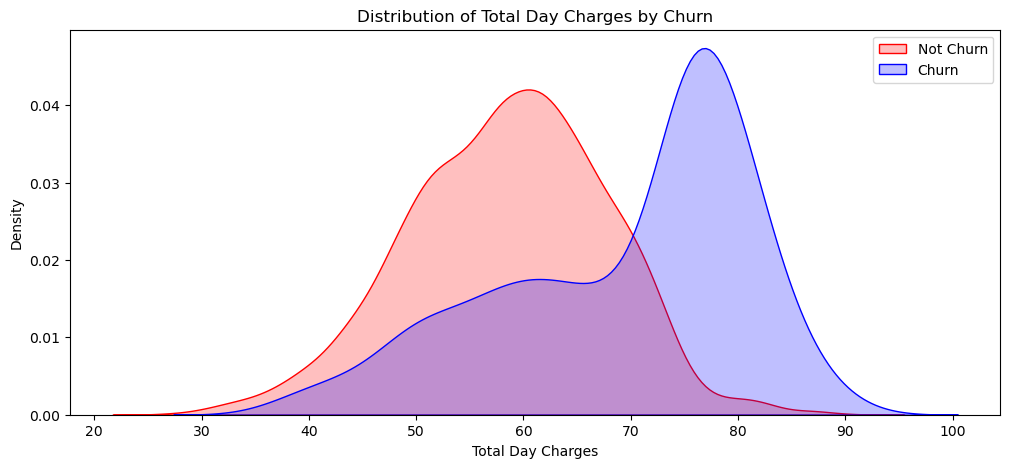

In [39]:
ax = sns.kdeplot(df_all.total_charge[(df_all['churn'] == 'no')], color = 'red', shade = True)
ax = sns.kdeplot(df_all.total_charge[(df_all['churn'] == 'yes')], color = 'blue', shade = True)
ax.legend(['Not Churn', 'Churn'], loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Day Charges')
ax.set_title('Distribution of Total Day Charges by Churn')

There's higher churn when total call charges are getting higher because there's a time they will get a overcharge, except at night

### Correlation

In [40]:
df_all.corr()

,account_length,number_customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,total_calls,total_charge,total_minutes
account_length,1.000000,-0.010043,-0.018120,0.029983,-0.009141,-0.009138,0.017207,-0.010659,-0.010669,0.021191,0.014929,0.014938,0.001510,-0.002825,-0.002810,0.029288,-0.012103,-0.012765
number_customer_service_calls,-0.010043,1.000000,-0.012561,-0.024768,-0.006807,-0.006802,0.000274,-0.031217,-0.031204,0.012088,-0.008987,-0.008889,0.009538,-0.009968,-0.009966,-0.007834,-0.021772,-0.027790
number_vmail_messages,-0.018120,-0.012561,1.000000,0.000253,0.017868,0.017874,-0.008478,0.020031,0.020031,-0.017656,0.007384,0.007341,-0.004491,0.001849,0.001846,-0.008407,0.025044,0.023508
total_day_calls,0.029983,-0.024768,0.000253,1.000000,0.011896,0.011894,0.016516,0.007692,0.007681,0.012891,0.002277,0.002192,0.002947,0.009923,0.009919,0.585436,0.016059,0.017290
total_day_charge,-0.009141,-0.006807,0.017868,0.011896,1.000000,1.000000,-0.002468,-0.008451,-0.008438,-0.006939,-0.017617,-0.017644,-0.010256,0.008000,0.008015,-0.000907,0.882871,0.606653
total_day_minutes,-0.009138,-0.006802,0.017874,0.011894,1.000000,1.000000,-0.002466,-0.008452,-0.008440,-0.006940,-0.017615,-0.017642,-0.010257,0.008001,0.008016,-0.000907,0.882871,0.606653
total_eve_calls,0.017207,0.000274,-0.008478,0.016516,-0.002468,-0.002466,1.000000,-0.007971,-0.007983,-0.004795,-0.004172,-0.004170,-0.010770,0.018816,0.018778,0.579717,-0.001651,0.004508
total_eve_charge,-0.010659,-0.031217,0.020031,0.007692,-0.008451,-0.008452,-0.007971,1.000000,1.000000,0.009513,0.004532,0.004500,0.004195,-0.022371,-0.022353,0.002805,0.402302,0.550580
total_eve_minutes,-0.010669,-0.031204,0.020031,0.007681,-0.008438,-0.008440,-0.007983,1.000000,1.000000,0.009507,0.004535,0.004504,0.004193,-0.022359,-0.022341,0.002790,0.402316,0.550595
total_intl_calls,0.021191,0.012088,-0.017656,0.012891,-0.006939,-0.006940,-0.004795,0.009513,0.009507,1.000000,-0.002085,-0.002208,0.000925,-0.007827,-0.007855,0.066840,-0.004065,-0.003341


### Regression Plot

<AxesSubplot:xlabel='total_intl_minutes', ylabel='total_intl_charge'>

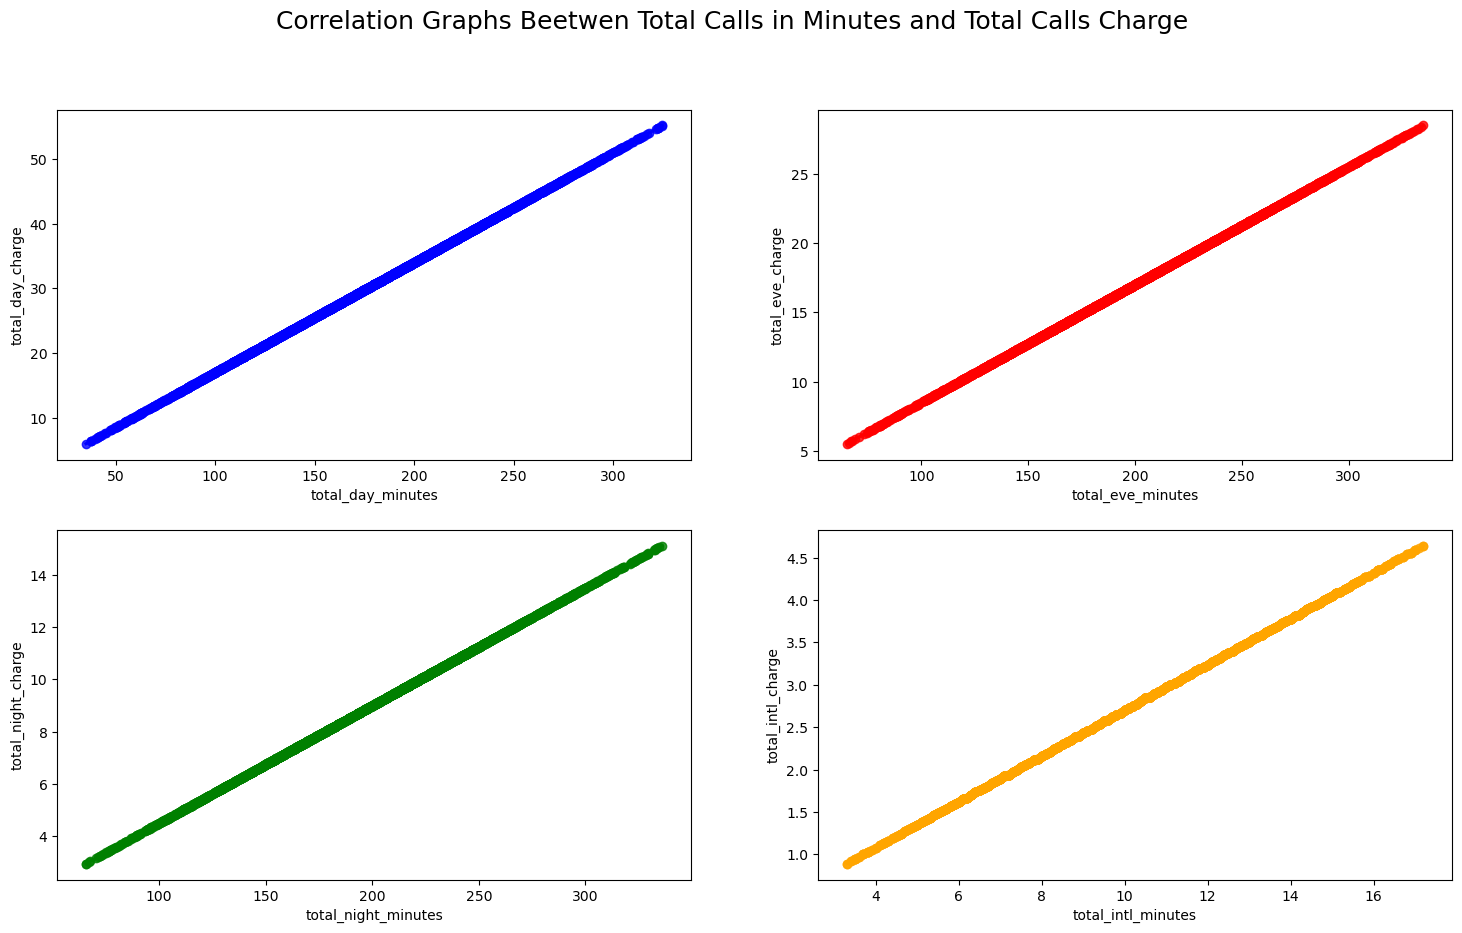

In [41]:
fig, axes = plt.subplots(2, 2, figsize = (18,10))
fig.suptitle('Correlation Graphs Beetwen Total Calls in Minutes and Total Calls Charge', fontsize = 18)

# Correlation beetwen Total Day Minutes and Total Day Charge
sns.regplot(ax=axes[0, 0], data=df_all, x='total_day_minutes', y='total_day_charge', color='b')
# plt.title('Correlation beetwen Total Day Minutes and Total Day Charge')
# plt.xlabel('Total Day Minutes')
# plt.ylabel('Total Day Charge')

# Correlation beetwen Total Evening Minutes and Total Evening Charge
sns.regplot(ax=axes[0, 1], data=df_all, x='total_eve_minutes', y='total_eve_charge', color='r')
# plt.title('Correlation beetwen Total Evening Minutes and Total Evening Charge')
# plt.xlabel('Total Evening Minutes')
# plt.ylabel('Total Evening Charge')

# Correlation beetwen Total Night Minutes and Total Night Charge
sns.regplot(ax=axes[1, 0], data=df_all, x='total_night_minutes', y='total_night_charge', color='g')
# plt.title('Correlation beetwen Total Night Minutes and Total Night Charge')
# plt.xlabel('Total Night Minutes')
# plt.ylabel('Total Night Charge')

# Correlation beetwen Total International Minutes and Total International Charge
sns.regplot(ax=axes[1, 1], data=df_all, x='total_intl_minutes', y='total_intl_charge', color='orange')
# plt.title('Correlation beetwen Total International Minutes and Total International Charge')
# plt.xlabel('Total International Minutes')
# plt.ylabel('Total International Charge')

As we can see,

The Correlations what we got from :
1. Variable beetwen Total Day Minutes and Total Day Charge got r : 1 (Perfect Positive Correlation)
2. Variable beetwen Total Evening Minutes and Total Evening Charge got r : 1 (Perfect Positive Correlation)
3. Variable beetwen Total Night Minutes and Total Night Charge got r : 0.9 (High Positive Correlation)
4. Variable beetwen Total International Minutes and Total International Charge got r : 0.9 (High Positive Correlation)

Throught the correlation results we got a regression plot as above.
So, we know from the regression plots above that the longer you call, the higher cost you will get when you make a call. We can also see from the regression plots above that when people do a call on Day they will get higher cost and as the day changes from day to night, the costs people get when people do call become less. I have the initial assumptions that there's a night quota that need is indeed offered by X Provider, due to the quota used only at night so not everyone wake up at that hour. This can be proven through the data variance between Total Minutes of Night Calls and Total Minutes of Night Calls where the variances are 2397.60 and 2395.48 which are almost the same and the variances from total charges beetwen those are 17.32 and 4.85 which are really far

### Feature Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [43]:
# Convert into the Binary (0 1)

# Churn
LE = LabelEncoder()
df_all['churn'] = LE.fit_transform(df_all['churn'])
print(LE.classes_)
print(np.sort(df_all['churn'].unique()))

['no' 'yes']
[0 1]


In [44]:
# International Plan
LE = LabelEncoder()
df_all['international_plan'] = LE.fit_transform(df_all['international_plan'])
print(LE.classes_)
print(np.sort(df_all['international_plan'].unique()))

['no' 'yes']
[0 1]


In [45]:
# Vmail Plan
LE = LabelEncoder()
df_all['voice_mail_plan'] = LE.fit_transform(df_all['voice_mail_plan'])
print(LE.classes_)
print(np.sort(df_all['voice_mail_plan'].unique()))

['no' 'yes']
[0 1]


### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In this step I will rescale each of variables because as we can see each of them have a different scales. The example are account_length variable have a value range 1 - 205 and total_day_minutes variable have a value range 35 - 324. Before we go the next step, we have to make each of these variables have a same value range, because if we don't rescale it then the variable who has a high value range will be dominated in training process.

In [47]:
df_all.describe(include='all')

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan,total_calls,total_charge,total_minutes,account_length_group
count,4160.000000,4160,4160.000000,4160.000000,4160.000000,4160.00000,4160,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160
unique,NaN,3,NaN,NaN,NaN,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,area_code_415,NaN,NaN,NaN,NaN,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 6 years
freq,NaN,2077,NaN,NaN,NaN,NaN,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3133
mean,99.543029,NaN,0.088702,0.093029,1.316106,7.38149,NaN,99.997115,30.623731,180.136226,100.179087,17.058334,200.683774,4.267308,2.785707,10.315505,99.841106,9.021026,200.464952,0.258654,304.284615,59.488798,591.600457,NaN
std,39.188959,NaN,0.284347,0.290508,0.976930,13.02375,NaN,19.209942,8.897424,52.338228,19.320058,4.162089,48.965382,2.066388,0.693571,2.569106,19.197709,2.202482,48.943734,0.437948,33.500249,10.044107,86.164630,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,0.00000,NaN,48.000000,5.970000,35.100000,47.000000,5.540000,65.200000,1.000000,0.890000,3.300000,48.000000,2.960000,65.700000,0.000000,191.000000,27.080000,284.300000,NaN
25%,73.000000,NaN,0.000000,0.000000,1.000000,0.00000,NaN,87.000000,24.450000,143.800000,87.000000,14.200000,167.000000,3.000000,2.320000,8.600000,87.000000,7.530000,167.300000,0.000000,282.000000,52.480000,532.700000,NaN
50%,100.000000,NaN,0.000000,0.000000,1.000000,0.00000,NaN,100.000000,30.600000,180.000000,100.000000,17.090000,201.000000,4.000000,2.810000,10.400000,100.000000,9.010000,200.200000,0.000000,305.000000,59.595000,592.000000,NaN
75%,126.000000,NaN,0.000000,0.000000,2.000000,15.00000,NaN,113.000000,36.700000,215.900000,113.000000,19.870000,233.800000,5.000000,3.240000,12.000000,113.000000,10.570000,234.825000,1.000000,327.000000,66.180000,650.125000,NaN


In [48]:
# Standardization
df_all['account_length'] = StandardScaler().fit_transform(df_all['account_length'].values.reshape(len(df_all), 1))
df_all['total_day_calls'] = StandardScaler().fit_transform(df_all['total_day_calls'].values.reshape(len(df_all), 1))
df_all['total_day_charge'] = StandardScaler().fit_transform(df_all['total_day_charge'].values.reshape(len(df_all), 1))
df_all['total_day_minutes'] = StandardScaler().fit_transform(df_all['total_day_minutes'].values.reshape(len(df_all), 1))

df_all['total_eve_calls'] = StandardScaler().fit_transform(df_all['total_eve_calls'].values.reshape(len(df_all), 1))
df_all['total_eve_charge'] = StandardScaler().fit_transform(df_all['total_eve_charge'].values.reshape(len(df_all), 1))
df_all['total_eve_minutes'] = StandardScaler().fit_transform(df_all['total_eve_minutes'].values.reshape(len(df_all), 1))

df_all['total_intl_calls'] = StandardScaler().fit_transform(df_all['total_intl_calls'].values.reshape(len(df_all), 1))
# df_all['total_intl_charge'] = StandardScaler().fit_transform(df_all['total_intl_charge'].values.reshape(len(df_all), 1))
df_all['total_intl_minutes'] = StandardScaler().fit_transform(df_all['total_intl_minutes'].values.reshape(len(df_all), 1))

df_all['total_night_calls'] = StandardScaler().fit_transform(df_all['total_night_calls'].values.reshape(len(df_all), 1))
df_all['total_night_charge'] = StandardScaler().fit_transform(df_all['total_night_charge'].values.reshape(len(df_all), 1))
df_all['total_night_minutes'] = StandardScaler().fit_transform(df_all['total_night_minutes'].values.reshape(len(df_all), 1))

# Normalization
df_all['number_vmail_messages'] = MinMaxScaler().fit_transform(df_all['number_vmail_messages'].values.reshape(len(df_all), 1))

I use standard scaler because if I see throught the describe the variables are normal distribution because mean and median can be said to have the same value or close to, So I decided to change the data into standard form where those mean will be centered (0) and the standard deviation wil be 1.

In [49]:
# After rescaling
df_all.describe()

,account_length,churn,international_plan,number_customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan,total_calls,total_charge,total_minutes
count,4.160000e+03,4160.000000,4160.000000,4160.000000,4160.000000,4.160000e+03,4.160000e+03,4.160000e+03,4.160000e+03,4.160000e+03,4.160000e+03,4.160000e+03,4160.000000,4.160000e+03,4.160000e+03,4.160000e+03,4.160000e+03,4160.000000,4160.000000,4160.000000,4160.000000
mean,8.097823e-17,0.088702,0.093029,1.316106,0.175750,7.259151e-18,1.248801e-16,7.002945e-17,2.601685e-16,-3.111560e-16,4.846551e-17,-4.939959e-16,2.785707,-3.117965e-16,2.003205e-16,2.741263e-16,2.506409e-16,0.258654,304.284615,59.488798,591.600457
std,1.000120e+00,0.284347,0.290508,0.976930,0.310089,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,0.693571,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,0.437948,33.500249,10.044107,86.164630
min,-2.514863e+00,0.000000,0.000000,0.000000,0.000000,-2.707107e+00,-2.771217e+00,-2.771467e+00,-2.752863e+00,-2.767774e+00,-2.767262e+00,-1.581359e+00,0.890000,-2.731047e+00,-2.700704e+00,-2.752238e+00,-2.753798e+00,0.000000,191.000000,27.080000,284.300000
25%,-6.773903e-01,0.000000,0.000000,1.000000,0.000000,-6.766641e-01,-6.939619e-01,-6.943413e-01,-6.822273e-01,-6.868373e-01,-6.879927e-01,-6.133699e-01,2.320000,-6.678242e-01,-6.689678e-01,-6.770570e-01,-6.776953e-01,0.000000,282.000000,52.480000,532.700000
50%,1.166211e-02,0.000000,0.000000,1.000000,0.000000,1.501807e-04,-2.667471e-03,-2.603113e-03,-9.270576e-03,7.609082e-03,6.458930e-03,-1.293755e-01,2.810000,3.289290e-02,8.277724e-03,-5.006973e-03,-5.414049e-03,0.000000,305.000000,59.595000,592.000000
75%,6.751940e-01,0.000000,0.000000,2.000000,0.357143,6.769644e-01,6.830067e-01,6.834024e-01,6.636862e-01,6.756233e-01,6.764005e-01,3.546190e-01,3.240000,6.557525e-01,6.855232e-01,7.033701e-01,7.021160e-01,1.000000,327.000000,66.180000,650.125000
max,2.691310e+00,1.000000,1.000000,3.000000,1.000000,2.707407e+00,2.762510e+00,2.762439e+00,2.786088e+00,2.744545e+00,2.743415e+00,2.774592e+00,4.640000,2.680046e+00,2.717260e+00,2.769470e+00,2.771578e+00,1.000000,409.000000,90.120000,882.200000


In [50]:
df_all.corr()

,account_length,churn,international_plan,number_customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan,total_calls,total_charge,total_minutes
account_length,1.000000,0.010543,0.017378,-0.010043,-0.018120,0.029983,-0.009141,-0.009138,0.017207,-0.010659,-0.010669,0.021191,0.014929,0.014938,0.001510,-0.002825,-0.002810,-0.006309,0.029288,-0.012103,-0.012765
churn,0.010543,1.000000,0.252281,-0.005750,-0.098025,0.001367,0.280205,0.280213,-0.015716,0.112898,0.112913,-0.048139,0.054661,0.054663,-0.006799,0.064689,0.064716,-0.107051,-0.015145,0.312958,0.272763
international_plan,0.017378,0.252281,1.000000,-0.024851,0.012670,0.019264,0.025528,0.025525,0.003200,0.018709,0.018718,-0.001381,0.026900,0.026932,0.007350,-0.020765,-0.020772,0.011152,0.017019,0.027670,0.015145
number_customer_service_calls,-0.010043,-0.005750,-0.024851,1.000000,-0.012561,-0.024768,-0.006807,-0.006802,0.000274,-0.031217,-0.031204,0.012088,-0.008987,-0.008889,0.009538,-0.009968,-0.009966,-0.021428,-0.007834,-0.021772,-0.027790
number_vmail_messages,-0.018120,-0.098025,0.012670,-0.012561,1.000000,0.000253,0.017868,0.017874,-0.008478,0.020031,0.020031,-0.017656,0.007384,0.007341,-0.004491,0.001849,0.001846,0.959646,-0.008407,0.025044,0.023508
total_day_calls,0.029983,0.001367,0.019264,-0.024768,0.000253,1.000000,0.011896,0.011894,0.016516,0.007692,0.007681,0.012891,0.002277,0.002192,0.002947,0.009923,0.009919,-0.003312,0.585436,0.016059,0.017290
total_day_charge,-0.009141,0.280205,0.025528,-0.006807,0.017868,0.011896,1.000000,1.000000,-0.002468,-0.008451,-0.008438,-0.006939,-0.017617,-0.017644,-0.010256,0.008000,0.008015,0.010024,-0.000907,0.882871,0.606653
total_day_minutes,-0.009138,0.280213,0.025525,-0.006802,0.017874,0.011894,1.000000,1.000000,-0.002466,-0.008452,-0.008440,-0.006940,-0.017615,-0.017642,-0.010257,0.008001,0.008016,0.010029,-0.000907,0.882871,0.606653
total_eve_calls,0.017207,-0.015716,0.003200,0.000274,-0.008478,0.016516,-0.002468,-0.002466,1.000000,-0.007971,-0.007983,-0.004795,-0.004172,-0.004170,-0.010770,0.018816,0.018778,-0.010534,0.579717,-0.001651,0.004508
total_eve_charge,-0.010659,0.112898,0.018709,-0.031217,0.020031,0.007692,-0.008451,-0.008452,-0.007971,1.000000,1.000000,0.009513,0.004532,0.004500,0.004195,-0.022371,-0.022353,0.021093,0.002805,0.402302,0.550580


If we turn back to the correlation and we had done already change several non numeric into binary (0 1), from the churn variable  has sufficient correlation with international plan, total day minutes, and total day charge. The first thing we foudn before through the regression plot beetwen total day minutes and total day charge have a perfect positive correlation and also have a biggest total charge than the others, it can be seen throught the variances too.

### Retrieve Data into Train Data and Test Data

In [51]:
print('All Dataset : {}'.format(df_all.shape))

All Dataset : (4160, 24)


In [52]:
# Separate the train/test again
df_train = df_all.loc[:3409]
df_test = df_all.loc[3410:]
dfs = [df_train, df_test]

In [53]:
print('Train Shape : {}'.format(df_train.shape))
df_train = df_train.reset_index(drop=True)

Train Shape : (3410, 24)


In [54]:
print('Test Shape : {}'.format(df_test.shape))
df_test = df_test.reset_index(drop=True)

Test Shape : (750, 24)


After cleaning the data, we should retrieve them back into the train and test dataset

### Balanced Data

#### Imbalanced Data

0    3055
1     355
Name: churn, dtype: int64


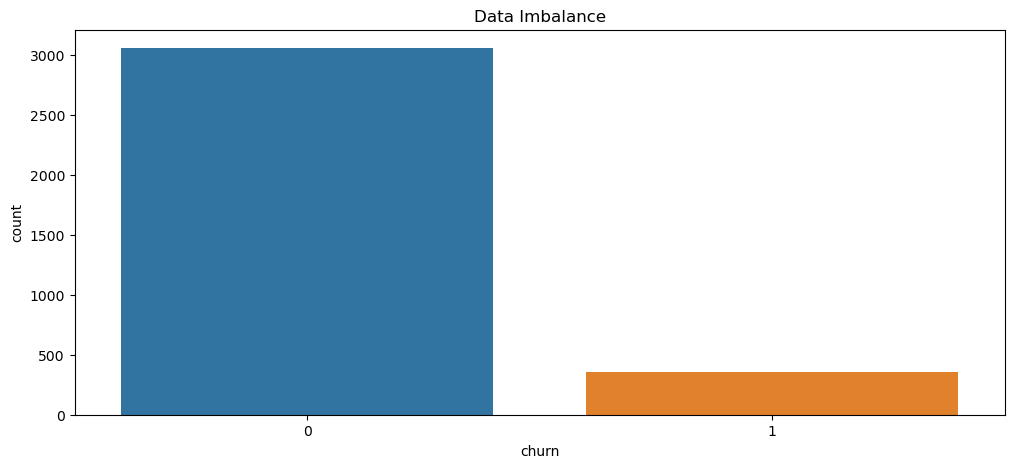

In [55]:
sns.countplot(x = 'churn', data=df_train)
plt.title('Data Imbalance')
print(df_train['churn'].value_counts())

The churn variable have imbalance data where not churn customer is more than the customers churn. In this step we have to make it balanced otherwise unbalanced class will make model difficult to learn pattern from small label like in churn label which only has 355. We can handle this imbalance using the undersampler/oversampler method.

In [56]:
cols_features = ['international_plan', 'total_day_minutes', 'total_day_charge']
X = df_train[cols_features]
y = df_train['churn']

In [57]:
X.head()

,international_plan,total_day_minutes,total_day_charge
0,0,-0.354205,-0.354497
1,0,1.208894,1.209065
2,1,-0.256750,-0.256704
3,1,-0.442105,-0.442173
4,1,1.499348,1.499071


In [58]:
from imblearn.under_sampling import RandomUnderSampler

In [59]:
resampled = RandomUnderSampler(random_state = 0, sampling_strategy = 'auto')
X_resampled, y_resampled = resampled.fit_resample(X, y)

In [60]:
y_resampled.value_counts()

0    355
1    355
Name: churn, dtype: int64

#### After Under Sampling

0    355
1    355
Name: churn, dtype: int64


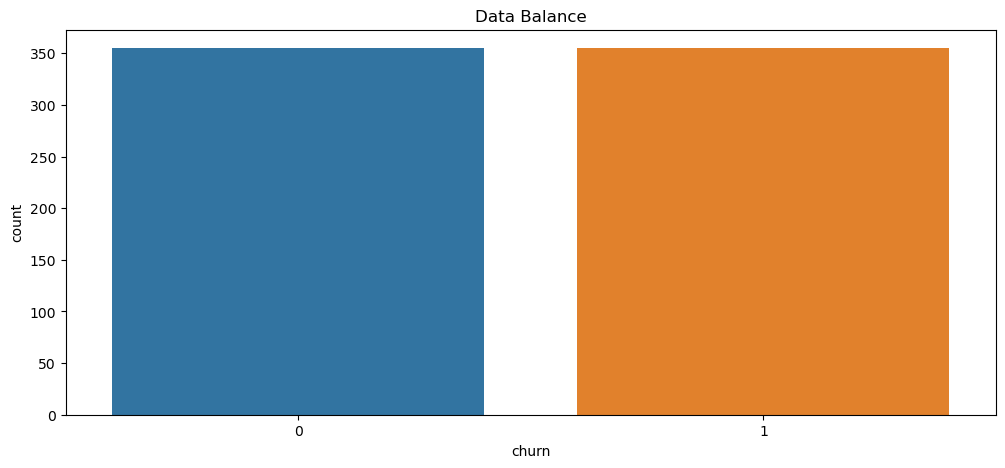

In [61]:
sns.countplot(x = y_resampled, data=df_train)
plt.title('Data Balance')
print(y_resampled.value_counts())

The method i use is the undersampler method which makes synthetic samples by randomly sampling the characteristics of occurrences in the majority class. So, the majority class (not churn) must have the same size as the minority class (churn class). Now, not churn customer class size has the same size as the churn class which through the countplot each of classes have 355.

### Modelling

#### Split the data for training and testing data

In [62]:
X_train = X_resampled
y_train = y_resampled.values
X_test = df_test[cols_features]
y_test = df_test['churn']

print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))

X_train shape : (710, 3)
y_train shape : (710,)
X_test shape : (750, 3)
y_test shape : (750,)


We splitted the data into X train and y train using data that was resampled for the previous undersampler for the model train. And for X test and y test only use general features (not use resampled variables).

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

#### Evaluate model performance

In [64]:
# Prepare Models
models = []
models.append(('Support Vector Classifier', SVC()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))

In [65]:
# Evaluate each of models
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(message)

Support Vector Classifier: 0.790263 (0.043404)
Logistic Regression: 0.781818 (0.040624)
Random Forest: 0.707158 (0.038343)


From the evaluate model performance using cross validation, the model Support Vector Classifier Algorithm get the best result in accuracy mean and it has standard deviation 0.04. The second is Logistic Regression and the third is Random Forest Classifier. From the result I decided to choose Support Vector Classifier for model predicting

### Prediction 

#### Train the model

In [66]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(kernel='poly')

I trained the SVC model with customization using only the poly kernel (you can tell that this is the default setting).

In [67]:
y_pred = svc.predict(X_test)

After train the model, next we predict the model using X test

#### Confusion Matrix

In this step, To measure the performance of the classification model that we use, We can use the Confusion Matrix which it represents the Actual value and predicted value in which the two values are compared which are compared which are formed into four parts, they are
- True Positive
- True Negative
- False Positive
- False Negative

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

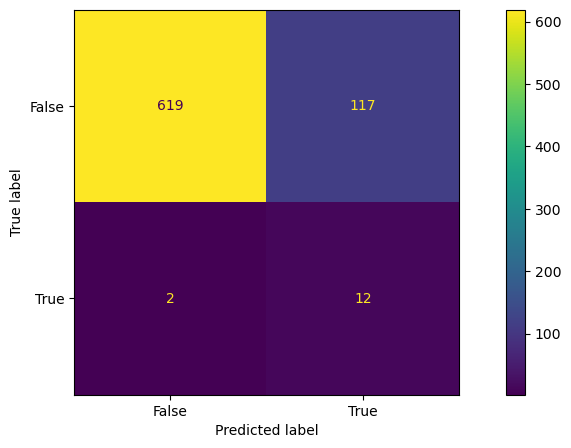

In [69]:
cnf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ['False', 'True'])
cm_display.plot()
plt.show()

In [70]:
TP = 12
TN = 619
FP = 117
FN = 2

Through the confusion matrix, as we can see,

We got the result
- True Positive = 12
- True Negative = 619
- False Positive = 117
- False Negative = 2 

In [71]:
# Accuracy
accuracy = (TP+TN)/(TP+FP+TN+TN)

# Recall
recall = TP/(TP+FN)

# Precision
precision = TP/(TP+FP)

# F1 score
f1 = (2*recall*precision)/(recall + precision)

print('Accuracy : {}%'.format(accuracy * 100))
print('Recall : {}%'.format(recall * 100))
print('Precision : {}%'.format(precision * 100))
print('F1 score : {}%'.format(f1 * 100))

Accuracy : 46.15947329919532%
Recall : 85.71428571428571%
Precision : 9.30232558139535%
F1 score : 16.78321678321678%


So, accord to the result throught the metrics. 
I will choose the metric <b> Recall </b>, because I prefer to choose False Positive over False Negative because False positive is not too fatal (Type 1 Error).As in this case the tendency of this model to predict this customer is churn in fact not churn, is considered better, than the customer is considered as not churn but in fact churn customer. We have the <b> recall score </b> 85%

#### Hyperparameter Tuning

In this step I will improve the model to predict. If usually humans based on their try&error to set the hyperparameters before the training starts. So, we can choose GridSearchCV to tune the hyperparamter for the model.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
""""param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}"""

'"param_grid = {\n    \'C\': [0.1, 1, 10, 100, 1000],\n    \'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\']\n}'

There are some parameter settings that will be selected by GridSearchCV

In [74]:
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [75]:
#grid.fit(X_train, y_train)

Finding the best parameters

In [76]:
# print best parameter after tuning
# print(grid.best_params_)

# print how the model looks after hyper-parameter tuning
# print(grid.best_estimator_)

Let see what parameters that we get.

In [77]:
grid = SVC(C=1, gamma=0.1, kernel='rbf')
grid.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

They are the best parameter value for improving support vector model

In [78]:
grid_pred = grid.predict(X_test)

This tuned model will predict using test data again 

In [79]:
# rf_tuned = RandomForestClassifier()

In [80]:
# grid_search = GridSearchCV(estimator=rf_tuned, param_grid = param_grid, cv=5)

In [81]:
# grid_search.fit(X_train, y_train)

In [82]:
#grid_search.best_params_

In [83]:
# best_grid = grid_search.best_estimator_

In [84]:
#rf_tuned = RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=500)
#rf_tuned.fit(X_train, y_train)

In [85]:
#y_pred_tuned = rf_tuned.predict(X_test)

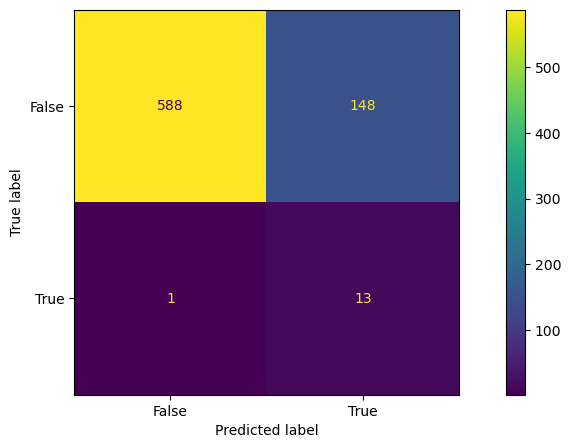

In [86]:
cnf_matrix = confusion_matrix(y_test, grid_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ['False', 'True'])
cm_display.plot()
plt.show()

In [87]:
TP = 13
TN = 588
FP = 148
FN = 1

Throught the hyperparameter tuning for the model we got a slight increase from TP and FN, but we got quite an improvement from TN and FP

In [88]:
# Accuracy
accuracy = (TP+TN)/(TP+FP+TN+TN)

# Recall
recall = TP/(TP+FN)

# Precision
precision = TP/(TP+FP)

# F1 score
f1 = (2*recall*precision)/(recall + precision)

print('Accuracy : {}%'.format(accuracy * 100))
print('Recall : {}%'.format(recall * 100))
print('Precision : {}%'.format(precision * 100))
print('F1 score : {}%'.format(f1 * 100))

Accuracy : 44.951383694839194%
Recall : 92.85714285714286%
Precision : 8.074534161490684%
F1 score : 14.857142857142854%


Throught this result, I will keep decide like what i did before which I prefer to choose Recall as a metric and the score for this metric got increase around 7% which It gets 92%.